1. **Problema**

 Muestre que la expresión que permite resolver el problema.
Construya una grafica para theta,¿Alrededor de que punto esta solución?

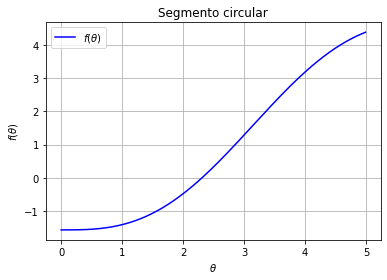

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize
from PIL import Image

θ=np.arange(0,5,0.01)
y=θ-np.sin(θ)-np.pi/2


plt.title('Segmento circular')
plt.plot(θ,y,'b',label='$f(θ)$')
plt.xlabel('$θ$')
plt.ylabel('$f(θ)$')
plt.grid()
plt.legend()
plt.show()

In [43]:
d = {'theta':θ, 'funcion':y}
df = pd.DataFrame(d)
df

,theta,funcion
0,0.00,-1.570796
1,0.01,-1.570796
2,0.02,-1.570795
3,0.03,-1.570792
4,0.04,-1.570786
...,...,...
495,4.95,4.351107
496,4.96,4.358704
497,4.97,4.366205
498,4.98,4.373609


Emplee el metodo de biseccion, punto fijo, newton y secante para comprobar la solución intuida del apartado anterior

In [14]:
f = lambda θ: θ-np.sin(θ)-np.pi/2
g = lambda θ: θ-f(θ)
dF = lambda θ: 1-np.cos(θ)

BS = optimize.bisect(f, 2.3, 2.4)
PF = optimize.fixed_point(g, 2.35)
NR = optimize.newton(f, 2, dF)
SC = optimize.newton(f, 2)

print('Raíz por cada método ')
print('Método de la bisección: ',BS)
print('Método de del punto fijo: ',PF)
print('Método de Newton-Rhapson: ',NR)
print('Método de la secante: ',SC)

Raíz por cada método 
Método de la bisección:  2.3098814600103648
Método de del punto fijo:  2.309881460010057
Método de Newton-Rhapson:  2.3098814600100575
Método de la secante:  2.309881460010033


2. **Problema de caída con viscosidad**

Parámetros:

In [54]:
g = 32.17 #ft/s^2
s0 = 300 #ft
m = 0.25 #lb
k = 0.1 #lb/ft
v0 = 0

Funciones necesarias:

In [55]:
f1 = lambda t: s0-(m*g/k)*t-m*((m*g+k*v0)/k**2)*(1-np.exp(-k*t/m))
dF1 = lambda t: -(m*g/k)-(m*g/k*np.exp(k*t/m))-(v0/np.exp(k*t/m))
g1 = lambda t: t - f1(t)


Gráfica:

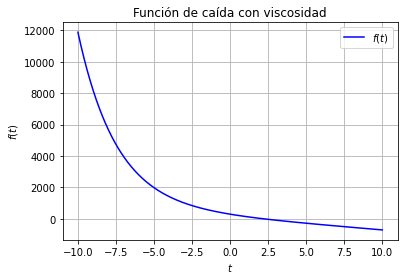

In [56]:
x = np.arange(-10, 10, 0.01)
y1 = f1(x)

plt.title('Función de caída con viscosidad')
plt.plot(x, y1, 'b', label='$f(t)$')
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.grid()
plt.legend()
plt.show()

Emplee el metodo de biseccion, punto fijo, newton y secante para comprobrar la solución

In [57]:
BS1 = optimize.bisect(f1, 1, 3)
PF1 = optimize.fixed_point(g1, 2)
NR1 = optimize.newton(f1, 1, dF1)
SC1 = optimize.newton(f1, 1)

print('Raíz por cada método ')
print('Método de la bisección: ',BS1)
print('Método de del punto fijo: ',PF1)
print('Método de Newton-Rhapson: ',NR1)
print('Método de la secante: ',SC1)

Raíz por cada método 
Método de la bisección:  2.247588475684097
Método de del punto fijo:  2.2475884756848012
Método de Newton-Rhapson:  2.247588455550957
Método de la secante:  2.2475884756848017


3. **Magnetización**

Para T = 0.5, determine:

In [59]:
T = 0.5
f2 = lambda m: m-np.tanh(m/T)
g2 = lambda m: m-f2(m)

Gráfica:

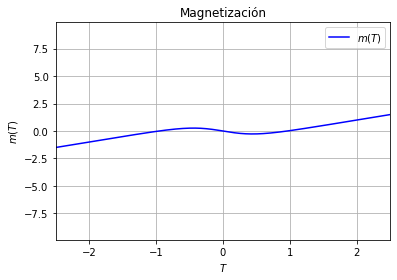

In [61]:
x1 = np.arange(-10, 10, 0.01)
y2 = f2(x1)

plt.title('Magnetización')
plt.plot(x1, y2, 'b', label='$m(T)$')
plt.xlabel('$T$')
plt.ylabel('$m(T)$')
plt.grid()
plt.xlim(-2.5, 2.5)
plt.legend()
plt.show()

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

In [63]:
s1 = optimize.newton(f2, -1)
s2 = optimize.newton(f2, 0)
s3 = optimize.newton(f2, 1)

print('Primera raíz: ', round(s1,4))
print('Segunda raíz: ', round(s2,4))
print('Tercera raíz: ', round(s3,4))

Primera raíz:  -0.9575
Segunda raíz:  0.0
Tercera raíz:  0.9575


b. Valide su respuesta con el metodo de punto fijo. (Muestre su resultado con 4 cifras)

In [72]:
pf1 = optimize.fixed_point(g2, -1)
pf2 = optimize.fixed_point(g2, 0)
pf3 = optimize.fixed_point(g2, 1)

print('Primera raíz: ', np.round(pf1, 4))
print('Primera raíz: ', np.round(pf2, 4))
print('Primera raíz: ', np.round(pf3, 4))

Primera raíz:  -0.9575
Primera raíz:  0.0
Primera raíz:  0.9575


c. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los 100 valores de T

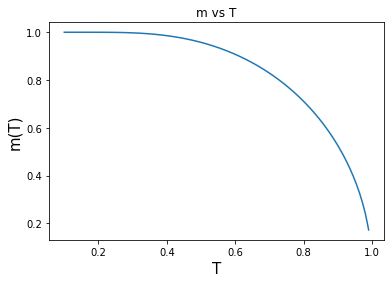

In [76]:
T1 = np.linspace(0.1, 0.99, 100)
r = np.zeros(len(T1))

for i in range (len(T1)):
  T = T1[i]
  r[i] = optimize.newton(f2, 1)

plt.title('m vs T')
plt.plot(T1, r)
plt.xlabel('T', size=15)
plt.ylabel('m(T)', size=15)
plt.show()

4. **Fractal**

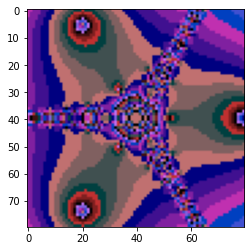

In [77]:
Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 

        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16

      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)